# PRÁCTICA CALIFICADA 3

Con Camila Durand - 20200918

## PARTE PRÁCTICA

In [1]:
#IMPORTANDO LIBRERÍAS
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

### a) Mercado de dinero

#### 1. Explique cuáles son los intrumentos de política monetaria que puede utilizar el Banco Central.

Se debe tomar en cuenta que, el Banco Central tiene la capacidad de controlar o gestionar la oferta monetaria y con esto puede hacer:
- una política monetaria expansiva (incrementa la oferta de dinero y por ende, la demanda agregada, pero se reduce la tasa de interés) o 
- una política monetaria contractiva (disminuye la oferta de dinero y aumenta la tasa de interés).

Y, para realizar estas acciones, el Banco Central tiene 3 posibles instrumentos:

1. La oferta monetaria
El Banco Central tiene la capacidad de regular el aumento o disminución de la oferta monetaria; y para esto, el Banco Central vende o compra activos financieros o bonos comerciales.
   - En una política monetaria expansiva: se realiza compra de bonos del mercado -> se introduce dinero a la economía -> aumento de la oferta monetaria
   - En una política monetaria contractiva:se realiza venta de bonos al mercado -> se retira dinero de la economía -> reducción de la oferta monetaria
   
   
2. El coeficiente legal de encaje
El Banco Central puede "controlar" la porción de depósitos de un banco; y para esto, el Banco Central el banco realiza:
   - En una política monetaria expansiva: se disminuye la tasa de encaje -> aumento del mutiplicador de dinero bancario -> aumento de posibilidad de creación de dinero bancario -> incremento de la cantidad de dinero bancario -> aumento de la oferta monetaria.
   - En una política monetaria contractiva: se aumenta la tasa de encaje -> reducción del mutiplicador de dinero bancario -> disminución de posibilidad de creación de dinero bancario -> disminución de la cantidad de dinero bancario -> disminución de la oferta monetaria.


3. La tasa de interés
Hace poco, el Banco Central se convirtió en un instrumento de política monetaria y se utiliza de la siguiente manera:
   - En una política monetaria expansiva: El BC reduce su tasa de interés de referencia -> incremento de la cantidad de dinero prestada a los bancos -> aumento de la base monetaria -> aumento de la oferta monetaria
   - En una política monetaria contractiva: El BC aumenta su tasa de interés de referencia -> disminución de dinero prestado a los bancos -> reducción de la base monetaria -> reducción de la oferta monetaria.

#### 2. Derive la oferta real de dinero y explique cada uno de sus componentes.

##### Derivando:
Se tiene de la oferta nominal es:
$M_o^s$ 

Entonces, para que esta pase a ser la oferta real, se le debe ajustar al nivel de precios:
$\frac {M_o^s}{P}$


##### Explicando:
Para la oferta real del dinero se tiene que:

$M_o^s$ representa a la cantidad de dinero circulando en la economía (variable exógena e instrumento de política); sin embargo, el dinero de los precios no es el mismo siempre -por la inflación-; por lo que este símbolo ($M_o^s$) será solo la masa monetaria nominal de dinero en la economía, no la oferta real.

Entonces, si se quiere pasar de la masa monetaria nominal (oferta nominal) a la oferta real, se debe ajustar ese valor por el nivel de los precios (p).

#### 3.Derive la demanda real de dinero. Explique qué papel cumplen los parametros "k" y "j"

##### Derivando:

Si se tiene que:
$$L=L_1+L_2$$
$$L_1=kY$$
$$L_2=-ji$$

Entonces
$$L=kY-ji$$

##### Explicando:
La previa derivación que corresponde a la demanda de dinero, la cual está relacionado a sus funciones. El primer bloque de la demanda (L1) está determinada por los motivos de transacción y precaución. Con respecto a las transacciones la magnitud de estas se encuentra en relación directa con el ingreso o producto de la economía. Y el motivo de precaución hace referencia a la capacidad de pago de deudas la cual depende directamente de sus ingresos. 

Es por ello que $L1=kY$ donde Y es el ingreso y “k” representa la sensibilidad o elasticidad de la demanda de dinero ante las variaciones de Y, al tener una relación positiva y directa ello indica que mientras más grande sea k mayor cantidad de dinero se va a demandar en cuanto se incremente el nivel de ingreso de la economía.

El segundo bloque de la demanda (L2) es determinada por el motivo de especulación el cual nos dice que se preferirá mantener liquidez en forma de dinero y no en forma de bonos cuando la tasa de interés se reduce pues ganaran menos si lo depositan en el banco, y lo contrario si aumenta. Es por ello que este segundo bloque depende negativa o inversamente de la tasa de interés de los bonos $L_2=-ji$. Donde el parámetro “j” indica cuán sensible es la demanda de dinero ante las variaciones de la tasa de interés nominal de los bonos, “i”.

#### 4. Asumiendo que no hay inflación podemos asumir que i = r. Escriba en terminos reales la ecuación de equilibrio en el mercado de dinero.

En términos reales, la ecuación del equilibrio de dinero sería:
$$M^s=M^d$$
$$\frac{M^s}{P}=kY-ji$$
Y asumiendo que i=r
$$M^s=P(kY-jr)$$

#### 5. Grafique el equilibrio en el mercado de dinero.

In [2]:
# Parameters
r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)
r

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [3]:
#Ecuación
def Ms_MD(k, j, r, Y):
    Ms_MD = (k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, r, Y)
Ms_MD

array([17.5, 17.3, 17.1, 16.9, 16.7, 16.5, 16.3, 16.1, 15.9, 15.7, 15.5,
       15.3, 15.1, 14.9, 14.7, 14.5, 14.3, 14.1, 13.9, 13.7, 13.5, 13.3,
       13.1, 12.9, 12.7, 12.5, 12.3, 12.1, 11.9, 11.7, 11.5, 11.3, 11.1,
       10.9, 10.7, 10.5, 10.3, 10.1,  9.9,  9.7,  9.5,  9.3,  9.1,  8.9,
        8.7,  8.5,  8.3,  8.1,  7.9,  7.7,  7.5,  7.3,  7.1,  6.9,  6.7,
        6.5,  6.3,  6.1,  5.9,  5.7,  5.5,  5.3,  5.1,  4.9,  4.7,  4.5,
        4.3,  4.1,  3.9,  3.7,  3.5,  3.3,  3.1,  2.9,  2.7,  2.5,  2.3,
        2.1,  1.9,  1.7,  1.5,  1.3,  1.1,  0.9,  0.7,  0.5,  0.3,  0.1,
       -0.1, -0.3, -0.5, -0.7, -0.9, -1.1, -1.3, -1.5, -1.7, -1.9, -2.1,
       -2.3])

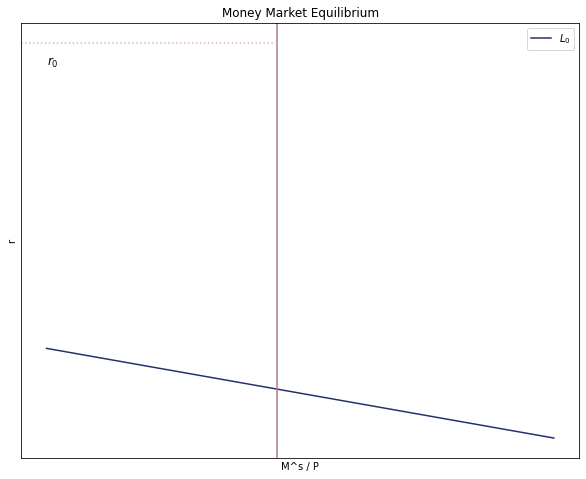

In [15]:
# Equilibrio en el mercado de dinero

MD_0 = MD(k, j, P, r, Y) 
# Creamos el seteo para la figura 
fig, ax1 = plt.subplots(figsize=(10, 8))

# Agregamos titulo t el nombre de las coordenadas
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')

# Ploteamos la demanda de dinero
ax1.plot(MD_0, label= '$L_0$', color = '#25316D')

# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "#AC7D88")

# Creamos las lineas puntadas para el equilibrio
ax1.axhline(y=85, xmin= 0, xmax= 0.46, linestyle = ":", color = "#DEB6AB")

# Agregamos texto
ax1.text(0, 80, "$r_0$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

### b) Estatica comparativa en el Mercado de Dinero 

#### 1. Explique y grafique qué sucede en el mercado de dinero si △Y < 0

##### Explicando:
Si el nivel del producto (Y) varia negativamente, es decir, se reduce entonces el intercepto se mueve hacia abajo.  La curva de demanda original se desplaza hacia abajo se llega a un nuevo punto de equilibrio que  muestra que la economia ha empeorado, la produccion se ha reducido y la gente demanda menos dinero, lo cual tomando en cuenta que el precio del dinero es la tasa de interes significa que la tasa de interes se reduce. la demanda de dinero se contrae y para la cantidad de dinero dada la tasa de inetres se reduce, la tasa de interes se comporta de manera endogena
$$↓Y → ↓M_d → ↓r $$

##### Graficando:

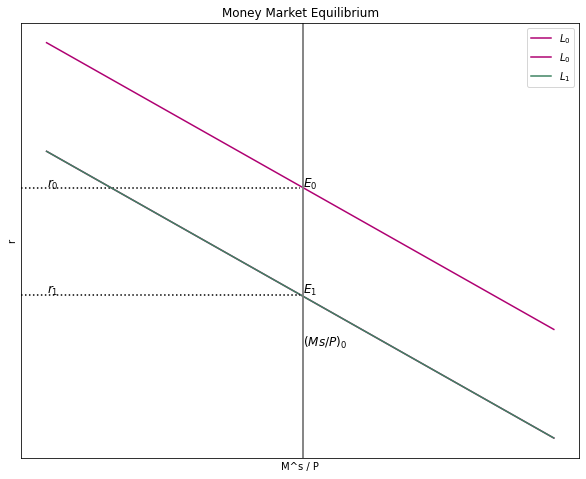

In [5]:
# Parameters con cambio en el nivel del producto
r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y_1 = 20
MS_0 = 500

r = np.arange(r_size)

# Necesitamos crear la funcion de demanda 

def MD(k, j, P, r, Y):
    MD_eq = (k*Y - j*r)
    return MD_eq
MD_1 = MD(k, j, P, r, Y_1)
MD_0 = MD(k, j, P, r, Y)

# Necesitamos crear la oferta de dinero.
MS = MS_0 / P
MS

# Equilibrio en el mercado de dinero

# Creamos el seteo para la figura 
fig, ax1 = plt.subplots(figsize=(10, 8))

# Agregamos titulo t el nombre de las coordenadas
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')

# Ploteamos la demanda de dinero
ax1.plot(MD_0, label= '$L_0$', color = '#AF0172')
ax1.plot(MD_1, label= '$L_0$', color = '#AF0171')


# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "grey")

# Creamos las lineas puntadas para el equilibrio
ax1.axhline(y=7.5, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")

# Agregamos texto
ax1.text(0, 7.5, "$r_0$", fontsize = 12, color = 'black')
ax1.text(50,-3.5, "$(Ms/P)_0$", fontsize = 12, color = 'black')
ax1.text(50, 7.5, "$E_0$", fontsize = 12, color = 'black')

# Nuevas curvas a partir del cambio en el nivel del producto
ax1.plot(MD_1, label= '$L_1$', color = '#3D8361')
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y=0.1, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")
ax1.text(0, 0.2, "$r_1$", fontsize = 12, color = 'black')
ax1.text(50, 0.2, "$E_1$", fontsize = 12, color = 'black')


ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

#### 2. Explique y grafique qué sucede en el mercado de dinero si △K < 0

##### Explicando:
Si k que representa la elasticidad/sensibilidad d ela demanda de dinero ante la variacion en Y, entonces tambein se producira una reduccion en la demanda de dinero por lo que la curva se desplazara hacia abajo. ESta reduccion tambien produciria un desequilibrio y para reestablecer el equilibrio es necesario que la tasa de interes tambien se reduzca

$$↓k → ↓M_d → ↓r $$

##### Graficando:

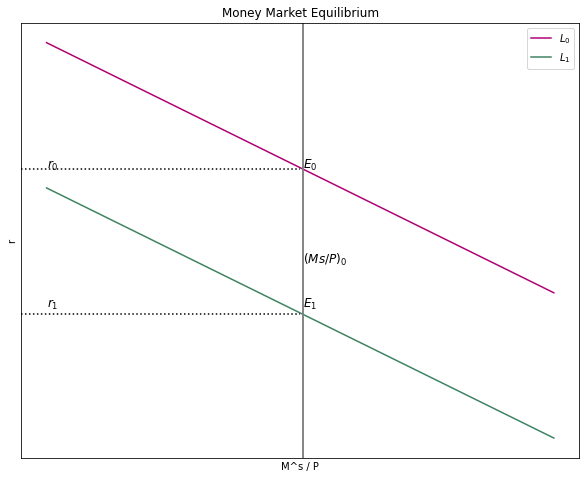

In [6]:
# Parameters con cambio en el nivel del producto
r_size = 100

k = 0.3
j = 0.2                
P  = 10 
Y= 35
MS_0 = 500

r = np.arange(r_size)

# Necesitamos crear la funcion de demanda 

def MD(k, j, P, r, Y):
    MD_eq = (k*Y - j*r)
    return MD_eq
MD_1 = MD(k, j, P, r, Y_1)
# Necesitamos crear la oferta de dinero.
MS = MS_0 / P
MS

# Equilibrio en el mercado de dinero

# Creamos el seteo para la figura 
fig, ax1 = plt.subplots(figsize=(10, 8))

# Agregamos titulo t el nombre de las coordenadas
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')

# Ploteamos la demanda de dinero
ax1.plot(MD_0, label= '$L_0$', color = '#AF0172')
#ax1.plot(MD_1, label= '$L_0$', color = '#CD5C5C')


# Para plotear la oferta de dinero solo necesitamos crear una linea vertical
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "grey")

# Creamos las lineas puntadas para el equilibrio
ax1.axhline(y=7.5, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")

# Agregamos texto
ax1.text(0, 7.5, "$r_0$", fontsize = 12, color = 'black')
ax1.text(50, 0, "$(Ms/P)_0$", fontsize = 12, color = 'black')
ax1.text(50, 7.5, "$E_0$", fontsize = 12, color = 'black')

# Nuevas curvas a partir del cambio en el nivel del producto
ax1.plot(MD_1, label= '$L_1$', color = '#3D8361')
ax1.axvline(x = MS,  ymin= 0, ymax= 1, color = "grey")
ax1.axhline(y= -4, xmin= 0, xmax= 0.5, linestyle = ":", color = "black")
ax1.text(0, -3.5, "$r_1$", fontsize = 12, color = 'black')
ax1.text(50, -3.5, "$E_1$", fontsize = 12, color = 'black')


ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

#### 3. Explique y grafique qué sucede en el mercado de dinero si △Ms < 0

##### Explicando:
Si la cantidad de dinero se reduce tambien lo hace la cantidad real de dinero porque esta en el numerador y guia por completo la direccion. La recta de la oferta de dinero se desplaza hacia la izquierda y por tanto se llega a un nuevo punto de equilibrio donde la tasa de interes aumenta y la demanda disminuye. La tasa de inetres ha aumenatdo con el proposito de reestablecer el equilibrio. 

Ello se puede evidenciar en:
$$↓M_0→ ↓\frac{M^s}{P}$$
$$↓\frac{M^s}{P}<M^d → ↑r$$

##### Graficando:

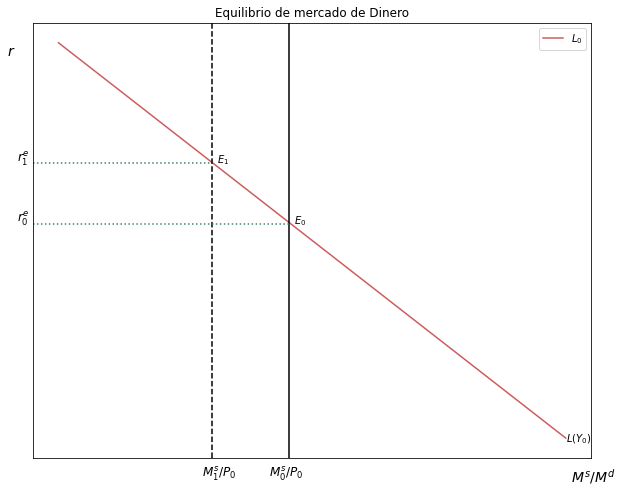

In [19]:
# Parameters con cambio en el nivel del producto
r_size = 100

k = 0.6
j = 0.3                
P  = 10 
Y = 35

r = np.arange(r_size)

    # Ecuación

def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)


  # Equilibrio en el mercado de dinero

fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set(title="Equilibrio de mercado de Dinero")
ax1.plot(Ms_MD, label= '$L_0$', color = '#CD5C5C')

ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "black")
ax1.axvline(x = 30,  ymin= 0, ymax= 1, color = "black",linestyle = 'dashed')
ax1.axhline(y=74, xmin= 0, xmax= 0.46, linestyle = ":", color = '#3D8361')
ax1.axhline(y=120, xmin= 0, xmax= 0.32, linestyle = ":", color = '#3D8361')
ax1.text(-10, 200, "$r$", fontsize = 14, color = 'black')
ax1.text(100, -120, "$M^s/M^d$", fontsize = 14, color = 'black')

ax1.text(-8, 75, "$r_0^e$", fontsize = 12, color = 'black')
ax1.text(-8, 120, "$r_1^e$", fontsize = 12, color = 'black')
ax1.text(41,-116, "$M_0^s/P_0$", fontsize = 12, color = 'black')
ax1.text(46,74, "$E_0$", fontsize = 10, color = 'black')
ax1.text(28, -116, "$M_1^s/P_0$", fontsize = 12, color = 'black')
ax1.text(31,120, "$E_1$", fontsize = 10, color = 'black')
ax1.text(99, -90, "$L(Y_0)$", fontsize = 10, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()

plt.show()

### c) Curva LM 

#### 1. Derive paso a paso la curva LM matemáticamente (a partir del equilibrio en el Mercado Monetario) y grafique.

##### Derivando:

Para hallar la curva LM a partir del equilibrio en el mercado monetario:

Se tiene previamente que en la demanda:

$$M^d = kY - jr$$

Se tiene previamente que en la oferta:

$$M^s = \frac{M_o^s}{p}$$

Para obtener el equilibrio:

$$M^d = M^s$$

Entonces, se igualan las ecuaciones:

$$kY - jr = \frac{M_o^s}{p}$$

$$ky - \frac{M_o^s}{p} = jr$$

$$\frac{kY}{j} - \frac{M_o^s}{pj} = r$$

$$r = - \frac{M_o^s}{pj} + \frac{kY}{j}$$

Esta última ecuación representa todos los puntos de equilibrio en el mercado monetario

Por lo tanto, la ecuación que representa a la curva LM en función de la tasa de interés que equilibra el mercado monetario es:

$$r = - \frac{1}{j} \frac{M^o_s}{P_o} + \frac{k}{j}$$


##### Graficando:

In [8]:
#1----------------------Equilibrio mercado monetario

    # Parameters
r_size = 100

k = 0.5
j = 0.2                
P  = 10 
Y = 35

r = np.arange(r_size)


    # Ecuación
def Ms_MD(k, j, P, r, Y):
    Ms_MD = P*(k*Y - j*r)
    return Ms_MD

Ms_MD = Ms_MD(k, j, P, r, Y)


    # Nuevos valores de Y
Y1 = 45

def Ms_MD_Y1(k, j, P, r, Y1):
    Ms_MD = P*(k*Y1 - j*r)
    return Ms_MD

Ms_Y1 = Ms_MD_Y1(k, j, P, r, Y1)


Y2 = 25

def Ms_MD_Y2(k, j, P, r, Y2):
    Ms_MD = P*(k*Y2 - j*r)
    return Ms_MD

Ms_Y2 = Ms_MD_Y2(k, j, P, r, Y2)

In [9]:
#2----------------------Curva LM

    # Parameters
Y_size = 100

k = 0.5
j = 0.2                
P  = 10               
Ms = 30            

Y = np.arange(Y_size)


# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

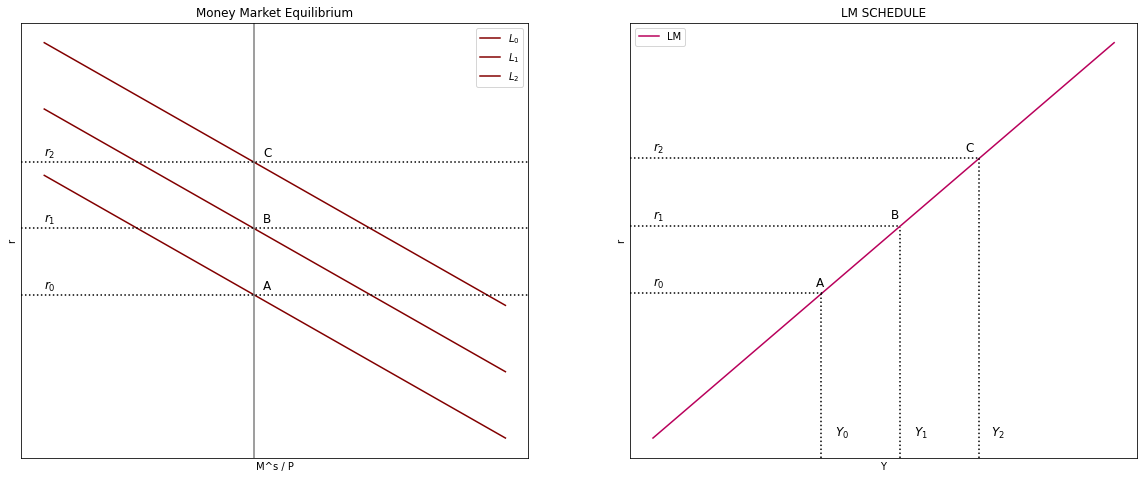

In [10]:
# Gráfico de la derivación de la curva LM a partir del equilibrio en el mercado monetario

    # Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8)) 


#---------------------------------
    # Gráfico 1: Equilibrio en el mercado de dinero
    
ax1.set(title="Money Market Equilibrium", xlabel=r'M^s / P', ylabel=r'r')
ax1.plot(Y, Ms_MD, label= '$L_0$', color = '#820000')
ax1.plot(Y, Ms_Y1, label= '$L_1$', color = '#820000')
ax1.plot(Y, Ms_Y2, label= '$L_2$', color = '#820000')
ax1.axvline(x = 45,  ymin= 0, ymax= 1, color = "grey")

ax1.axhline(y=35, xmin= 0, xmax= 1, linestyle = ":", color = "black")
ax1.axhline(y=135, xmin= 0, xmax= 1, linestyle = ":", color = "black")
ax1.axhline(y=85, xmin= 0, xmax= 1, linestyle = ":", color = "black")

ax1.text(47, 139, "C", fontsize = 12, color = 'black')
ax1.text(47, 89, "B", fontsize = 12, color = 'black')
ax1.text(47, 39, "A", fontsize = 12, color = 'black')

ax1.text(0, 139, "$r_2$", fontsize = 12, color = 'black')
ax1.text(0, 89, "$r_1$", fontsize = 12, color = 'black')
ax1.text(0, 39, "$r_0$", fontsize = 12, color = 'black')

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.legend()
 

#---------------------------------
    # Gráfico 2: Curva LM
    
ax2.set(title="LM SCHEDULE", xlabel=r'Y', ylabel=r'r')
ax2.plot(Y, i, label="LM", color = '#B9005B')

ax2.axhline(y=160, xmin= 0, xmax= 0.69, linestyle = ":", color = "black")
ax2.axhline(y=118, xmin= 0, xmax= 0.53, linestyle = ":", color = "black")
ax2.axhline(y=76, xmin= 0, xmax= 0.38, linestyle = ":", color = "black")

ax2.text(67, 164, "C", fontsize = 12, color = 'black')
ax2.text(51, 122, "B", fontsize = 12, color = 'black')
ax2.text(35, 80, "A", fontsize = 12, color = 'black')

ax2.text(0, 164, "$r_2$", fontsize = 12, color = 'black')
ax2.text(0, 122, "$r_1$", fontsize = 12, color = 'black')
ax2.text(0, 80, "$r_0$", fontsize = 12, color = 'black')

ax2.text(72.5, -14, "$Y_2$", fontsize = 12, color = 'black')
ax2.text(56, -14, "$Y_1$", fontsize = 12, color = 'black')
ax2.text(39, -14, "$Y_0$", fontsize = 12, color = 'black')

ax2.axvline(x=70,  ymin= 0, ymax= 0.69, linestyle = ":", color = "black")
ax2.axvline(x=53,  ymin= 0, ymax= 0.53, linestyle = ":", color = "black")
ax2.axvline(x=36,  ymin= 0, ymax= 0.38, linestyle = ":", color = "black")

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.legend()

plt.show()

#### 2. ¿Cuál es el efecto de una disminución en la Masa Monetaria △$M^s$ < 0? Explica usando la intuición y gráficos.

##### Explicando:

Usando la intuición:
Se tiene que hay un efecto de disminución en la oferta real del dinero o, en otras palabras, que se ha aplicado una política monetaria contractiva (la cantidad real de dinero disminuye).

Además, se tiene que la tasa de interés aumenta porque, al disminuir la oferta, se contrae la demanda agregada. Esto es un gráfico es: la oferta de dinero ($M^s$) se mueve para la izquierda con respecto a $M^d$. En otras palabras, el punto en el que demanda y oferta se encuentren en r, se dará más arriba (esto no implica que $M^d$ cambie.


##### Graficando:

In [17]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 700             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
Ms = 10

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

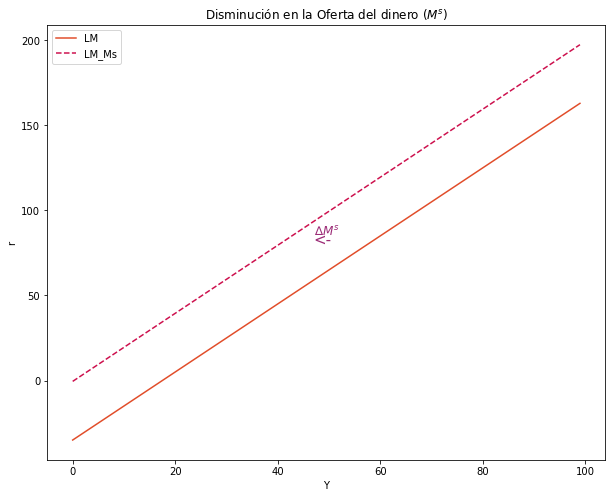

In [18]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = '#E14D2A')
ax.plot(Y, i_Ms, label="LM_Ms", color = '#CD104D', linestyle = 'dashed')

# Texto agregado
plt.text(47, 85, '∆$M^s$', fontsize=12, color='#9C2C77')
plt.text(47, 80, '<-', fontsize=15, color='#9C2C77')

# Título y leyenda
ax.set(title = "Disminución en la Oferta del dinero $(M^s)$", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

#### 3. ¿Cuál es el efecto de un aumento en k, △k > 0? Explica usando intuición y gráficos.

##### Explicando:

Usando la intuición; como la k se encuentra en la demanda:
Teniendo en cuenta a la transacción y a la precaución:

$$L_1 = kY$$

En esta primera sección k es la elasticidad del ingreso y es importante porque en dicha ecuación -sin tomar en cuenta aún a la especulación-, k será un determinante pues, es la elasticidad del total de ingresos dentro de una economía. En otras palabras, mientras más grande sea el K, mayor cantidad de dinero se va a demandar en cuanto se incremente el nivel de ingreso de la economía.

Ejemplo:
Si la economía funciona bien y/o mejora, surge el efecto de que las personas tienen el incentivo de obtener mayores cantidades de dinero (se demanda más dinero).  

Sin embargo, también se debe tomar en cuanta a la especulación: 

$$L_2 = -ji$$

Por lo que se tiene que:

$$M^d = L_1 + L_2$$

$$M^d = kY - ji$$

Para esto, se debe saber que M^d y K son directamente proporcionales, por lo que: si se encuentra un aumento en K, entonces $M^d$ también aumentará. 

Finalmente en el mercado monetario, si la gente demanda más dinero (porque la economía va bien), para la cantidad de dinero dada, la tasa de interés sube.

##### Graficando:

In [13]:
#--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 100             
P  = 10               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM

# Definir SOLO el parámetro cambiado
k = 12

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

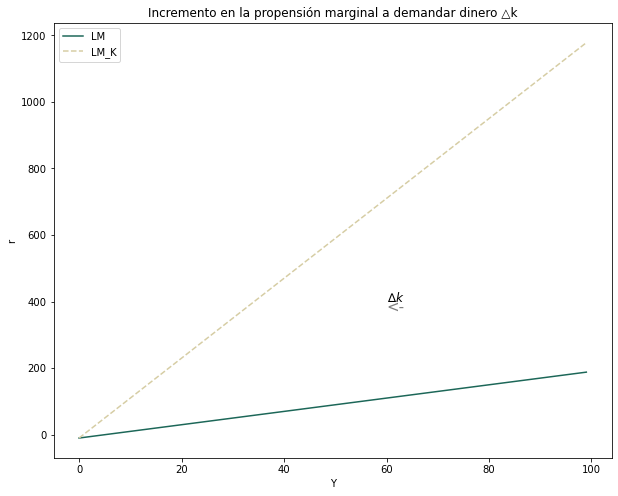

In [14]:
# Dimensiones del gráfico
y_max = np.max(i)
v = [0, Y_size, 0, y_max]   
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, i, label="LM", color = '#1C6758')
ax.plot(Y, i_Ms, label="LM_K", color = '#D6CDA4', linestyle = 'dashed')

# Texto agregado
plt.text(60, 400, '∆$k$', fontsize=12, color='black')
plt.text(60, 370, '<-', fontsize=15, color='grey')

# Título y leyenda
ax.set(title = "Incremento en la propensión marginal a demandar dinero △k", xlabel=r'Y', ylabel=r'r')
ax.legend()


plt.show()

## PARTE LECTURA

La pregunta de investigación del artículo podría ser ¿Cuál fue el modelo económico aplicado en el Perú para que, a pesar de ser una de las economías más afectadas por la pandemia en la región, su recuperación haya sido una de las mejores? y, por otro lado, ¿Qué otros modelos o factores se pueden aplicar para mejorar el resultado ante el golpe de la pandemia?

La fortaleza de este artículo es que pudo reconocer correctamente y responder cómo es que el modelo planteado ha podido enfrentar la plandeamia y se ha reconocido que es un "modelo de dos sectores". Además, se identificaron otras alternativas: primero, los autores proponen una comparación estática que considere la política pública en el terreno de la economía para que las medidas de alivio fiscal y las medidas de estímulo monetario para que estas puedan ser consideradas como una reducción de la tasa impositiva y de la tasa de interés. Segundo, Mendoza propone la implementación de agentes con "expectativas racionales" para que el precio esperado se iguale al precio del equilibrio y que la dinçámica del estado estacionario sea distinta. La última alternativa que los autores proponen es que se pueda analizar el efecto de la duración de la cuarenta sobre el producto potencial.

Una debilidad del artículo puede ser que si bien se hacen críticas o "ideas a mejorar" del modelo, no se especifica si este es aplicable en otras economías regionales, por lo que la funcionalidad del modelo puede estar determinada por variables propias y no por ser un modelo ideal para contrarrestar el shock de la pandemia.

Asimismo y como se explicó, este documento contribuye a la pregunta de investigación de una manera clara. Explicita cómo el modelo aplicado al país pudo sobrellevar la pandemia y como fue uno de los mejores aplicados para el caso peruano. En este sentido, se reconoce como las políticas escogidas para la pandemia se enfocaron en no limitar o reducir la capacidad productiva de la economía. Por otro lado, para esto se reconocieron dos sectores, el primero afectado directamente por el COVID-19 y el segundo afectado indirectamente (afectado porque afectaba a este primer sector).
 
Finalmente, para poder avanzar con la pregunta del artículo se puede leer "Análisis del contexto económico en el Perú a partir del COVID-19. " debido a que el artículo analiza y se enfoca en el contexto del país antes de la pandemia y sus impicancias primicias. Por otro lado, a un nivel más individual, "Perú: Impacto de la COVID-19 en el empleo y los ingresos laborales." se puede analizar al individuo como agente de consumo, no solo mediante la demanda de los productos, sino también por su capacidad, en la pandemia, para adquirirlos (la diferencia entre el querer y poder).


Bibliografía:
- Mendoza, W; Mancilla, L & Rafael V. "La Macroeconomía de la cuarentena: Un modelo de dos sectores". Nº 506.
- Enríquez, C. A. R., Silva, M. S. Á., & Flores, I. C. L. (2021). Análisis del contexto económico en el Perú a partir del COVID-19. Revista Scientific, 6(21), 237-251.
- Gamero, J., & Pérez, J. (2020). Perú: Impacto de la COVID-19 en el empleo y los ingresos laborales. Nota técnica país− Panorama laboral en tiempos de la COVID-19. Organización Internacional del Trabajo. ilo. org/americas.
